In [54]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [55]:
with open('secretos.json', 'r') as file:
    api_key = json.load(file)

alpha_vantage_key = api_key['alpha_vantage']

In [56]:
params = {
    'function': 'FX_WEEKLY',
    'from_symbol': 'AUD',
    'to_symbol': 'USD',
    'datatype': 'json',
    'apikey': alpha_vantage_key
}

In [57]:
response = requests.get('https://www.alphavantage.co/query', params=params)

data = response.json()


In [58]:
df = pd.DataFrame(data['Time Series FX (Weekly)']).T

# Convert the data columns to numeric type from string
for column in df.columns:
    df[column] = pd.to_numeric(df[column])

In [60]:
df = df.iloc[::-1]

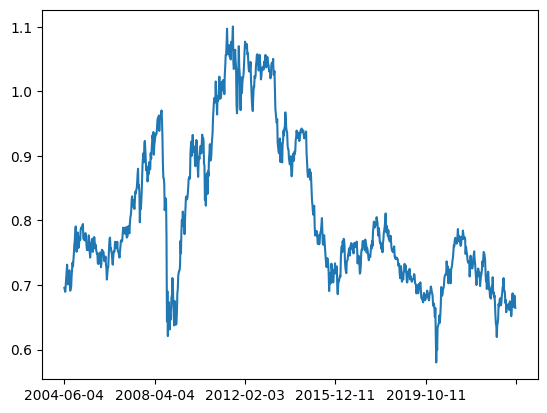

In [61]:
df['4. close'].plot()
plt.show()

In [64]:
df

,1. open,2. high,3. low,4. close
2004-06-04,0.71420,0.71730,0.68420,0.69570
2004-06-11,0.69620,0.70750,0.68600,0.69190
2004-06-18,0.69220,0.69920,0.67710,0.68940
2004-06-25,0.68900,0.70260,0.68420,0.70010
2004-07-02,0.69980,0.71380,0.68760,0.71320
...,...,...,...,...
2023-06-30,0.66735,0.67206,0.65948,0.66600
2023-07-07,0.66623,0.67054,0.65987,0.66880
2023-07-14,0.66894,0.68950,0.66231,0.68371
2023-07-21,0.68359,0.68467,0.67222,0.67283


In [62]:
df.to_csv('we_audusd.csv')